# xVertSeg data

Data format : mhd

In [38]:
import SimpleITK as sitk
import numpy as np
import os.path
import matplotlib.pyplot as plt
import math
import imageio

In [39]:
def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

In [40]:
def visualize_data_gif(stack, filename = 'gif', axis = 0, duration = 0.1):
        images = []
        for i in range(stack.shape[axis]):
            img = stack.take(indices = i, axis = axis)
            images.append(img)
        imageio.mimsave("{}.gif".format(filename), images, duration=duration)
        return None

In [41]:
def stack_2d(stack, dim = 0, rows = 6, start = 10, show_every = 10):
        cols = math.ceil((stack.shape[dim]-start) /(show_every * rows))
        fig,ax = plt.subplots(rows,cols,figsize=[12,12])
        for i in range(rows * cols):
            ind = min(start + i*show_every, stack.shape[dim]-1)
            if dim == 0:
                im_s = stack[ind, :, :]
            if dim == 1:
                im_s = stack[:, ind, :]
            if dim == 2:
                im_s = stack[:,:, ind]
            row, col = int(i/cols), i%cols
            #print("index : {i}, row {row}, col {col}".format(i = i, row = row, col = col))
            ax[row, col].set_title('slice {}'.format(ind))
            ax[row, col].imshow(im_s,cmap='gray')
            ax[row, col].axis('off')
        #plt.show()
        return fig

In [42]:
FOLDER = os.path.abspath('xVertSeg/Data1/')
file_nr = 1
imagename = os.path.join(FOLDER, f'images/image{file_nr:03d}.mhd')
maskname = os.path.join(FOLDER, f'masks/mask{file_nr:03d}.mhd')

In [43]:
imagename

'/home/jan/Documents/Projects/MastatThesis/Data/xVertSeg/Data1/images/image001.mhd'

In [44]:
img, orig, spacing = load_itk(imagename)
print(spacing)
print(img.shape)

[1.4506  0.41362 0.41362]
(200, 1024, 1024)


In [45]:
mask, orig, spacing = load_itk(maskname)
print(spacing)
print(mask.shape)

[1.4506  0.41362 0.41362]
(200, 1024, 1024)


nge [0, 2211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2119]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 2087]. Convert image to uint8 pr

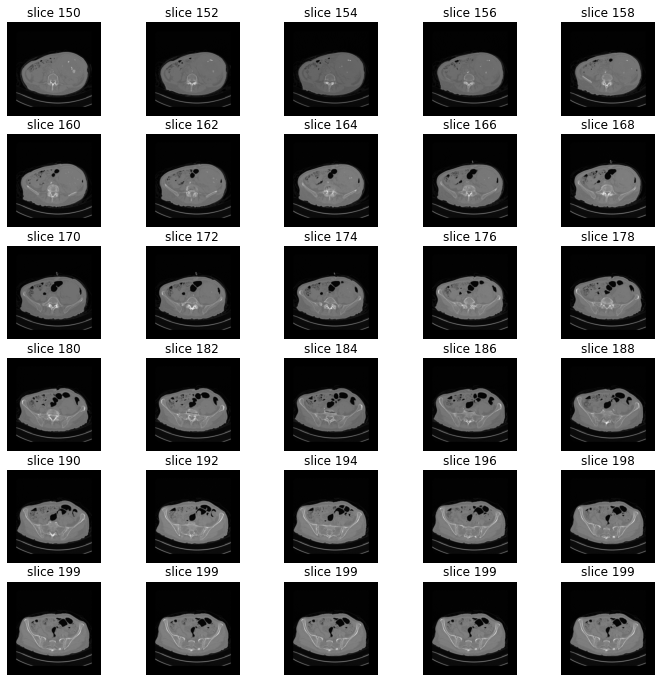

In [53]:
visualize_data_gif(img, filename='image')
_=stack_2d(img, dim=0, start=150, show_every=2)

In [50]:
mask_image = np.zeros_like(mask, dtype=np.uint8)
mask_image[np.where(mask==240)] = 250
mask_image

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

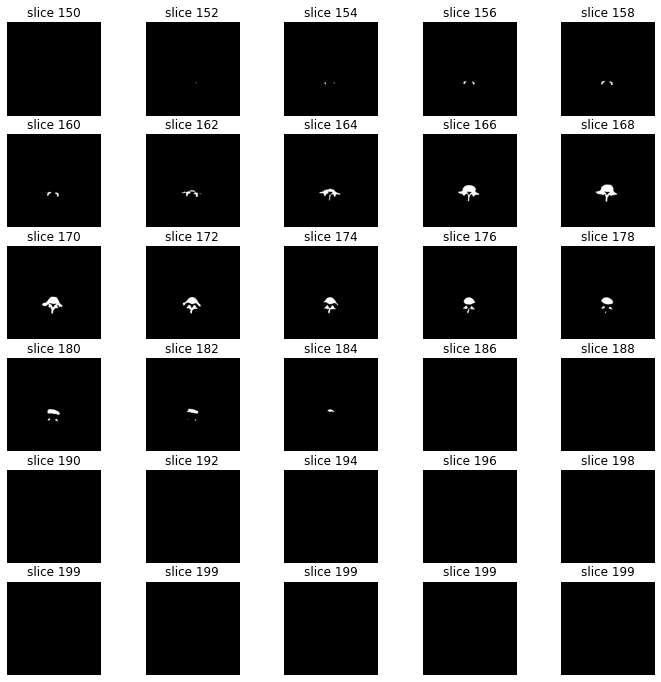

In [52]:
_=stack_2d(mask==240, dim=0, start=150, show_every=2)